In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
matplotlib.__version__

'3.8.4'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
#Define Path

path = r'C:\Users\msyeu\Hate Crime Analysis'

In [6]:
#Import Data
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'hate_crime_wrangled.csv'), index_col = False, low_memory=False)

In [7]:
df.shape

(199797, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199797 entries, 0 to 199796
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                199797 non-null  int64  
 1   INCIDENT_ID               199797 non-null  int64  
 2   DATA_YEAR                 199797 non-null  int64  
 3   ORI                       199797 non-null  object 
 4   PUB_AGENCY_NAME           199797 non-null  object 
 5   AGENCY_TYPE_NAME          199797 non-null  object 
 6   STATE_ABBR                199797 non-null  object 
 7   STATE_NAME                199797 non-null  object 
 8   DIVISION_NAME             199797 non-null  object 
 9   REGION_NAME               199797 non-null  object 
 10  POPULATION_GROUP_CODE     199797 non-null  object 
 11  POPULATION_GROUP_DESC     199797 non-null  object 
 12  INCIDENT_DATE             199797 non-null  object 
 13  TOTAL_OFFENDER_COUNT      199797 non-null  i

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199797 entries, 0 to 199796
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               199797 non-null  int64  
 1   DATA_YEAR                 199797 non-null  int64  
 2   ORI                       199797 non-null  object 
 3   PUB_AGENCY_NAME           199797 non-null  object 
 4   AGENCY_TYPE_NAME          199797 non-null  object 
 5   STATE_ABBR                199797 non-null  object 
 6   STATE_NAME                199797 non-null  object 
 7   DIVISION_NAME             199797 non-null  object 
 8   REGION_NAME               199797 non-null  object 
 9   POPULATION_GROUP_CODE     199797 non-null  object 
 10  POPULATION_GROUP_DESC     199797 non-null  object 
 11  INCIDENT_DATE             199797 non-null  object 
 12  TOTAL_OFFENDER_COUNT      199797 non-null  int64  
 13  OFFENDER_RACE             199778 non-null  o

In [11]:
df.shape

(199797, 22)

In [12]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,1,White,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,1,Black or African American,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,1,Black or African American,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


# 2. Exploring Relationships

In [13]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [14]:
#Create subset excluding categorical variables. 
sub = df[['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT', 'TOTAL_INDIVIDUAL_VICTIMS']]

In [15]:
#Create a correlation matrix using pandas
sub.corr()

,TOTAL_OFFENDER_COUNT,VICTIM_COUNT,TOTAL_INDIVIDUAL_VICTIMS
TOTAL_OFFENDER_COUNT,1.000000,0.115758,0.189649
VICTIM_COUNT,0.115758,1.000000,0.832902
TOTAL_INDIVIDUAL_VICTIMS,0.189649,0.832902,1.000000


In [16]:
sub.shape

(199797, 3)

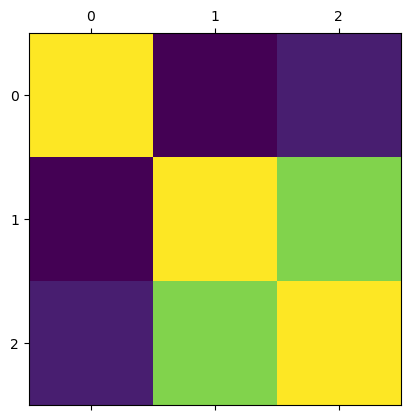

In [17]:
#Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

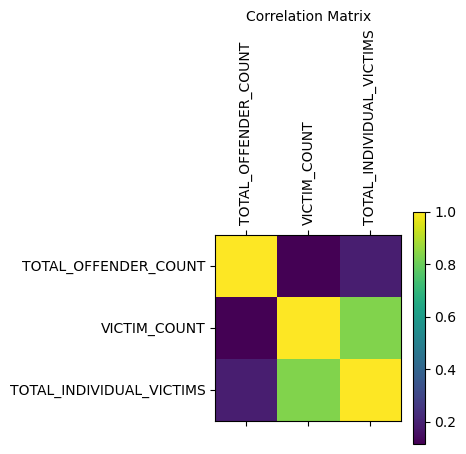

In [18]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(3, 3)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=10, rotation = 90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

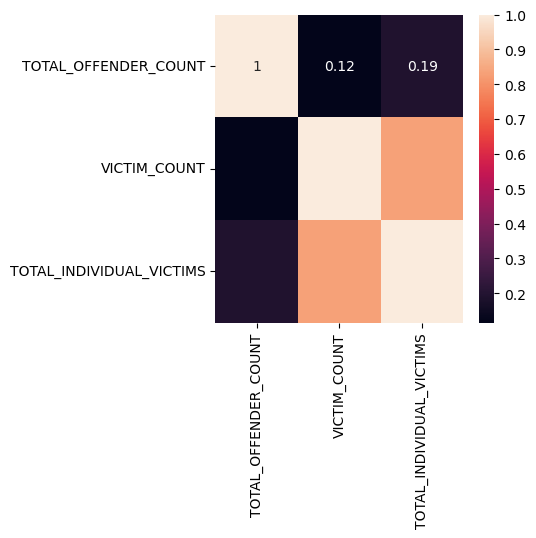

In [19]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(4,4))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The victim count and the total individual victims have strong correlation which makes sense. As the total number of individual victims increase, so will the victim count. There are weak correlations between the victim count and total offender count and between the total offender count and total individual victims. 

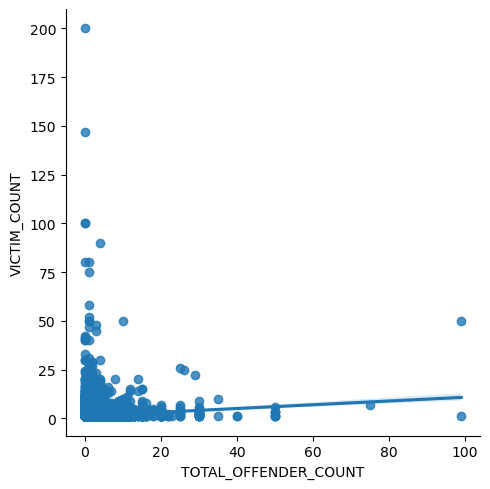

In [27]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "VICTIM_COUNT"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='VICTIM_COUNT', data = df)

The trend line is sloping upwards. Many points cluster near the beginning of the line, while the remaining points are outliers. According to the scatterplot, there appears to be a positive relationship though it is not particularly strong. 

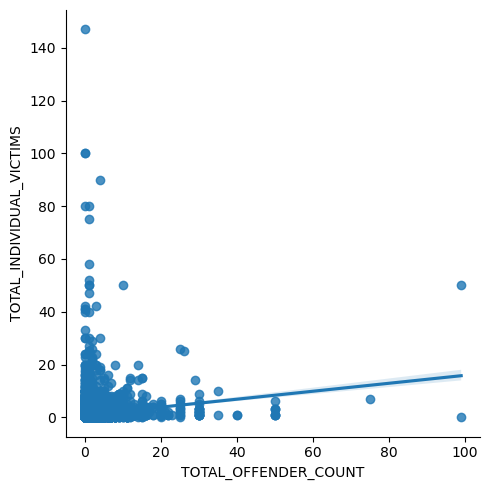

In [28]:
# Scatterplot for the "TOTAL_OFFENDER_COUNT" and the "TOTAL_INDIVIDUAL_VICTIMS"
sns.lmplot(x='TOTAL_OFFENDER_COUNT', y ='TOTAL_INDIVIDUAL_VICTIMS', data = df)

The trend line shows an upward trajectory. Many points cluster near the beginning of the line, with the rest of the points being outliers. According to the scatterplot, there appears to be a positive relationship, albeit not a strong one. However, this positive relationship appears stronger than that observed in the scatterplot comparing total offender count vs. victim count. 

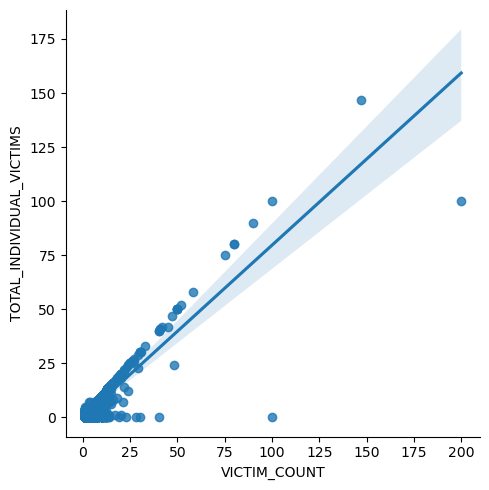

In [29]:
# Scatterplot for the "VICTIM_COUNT" and the "TOTAL_INDIVIDUAL_VICTIMS"
sns.lmplot(x='VICTIM_COUNT', y ='TOTAL_INDIVIDUAL_VICTIMS', data = df)

The trend line indicates an upward trend. Many points cluster near the beginning of the line, while some points are outliers. Based on the scatterplot, there appears to be a strong positive relationship. Among all three scatterplots, the relationship between the victim count and the total number of individual victims is the strongest.

In [30]:
sub.columns

Index(['TOTAL_OFFENDER_COUNT', 'VICTIM_COUNT', 'TOTAL_INDIVIDUAL_VICTIMS'], dtype='object')

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


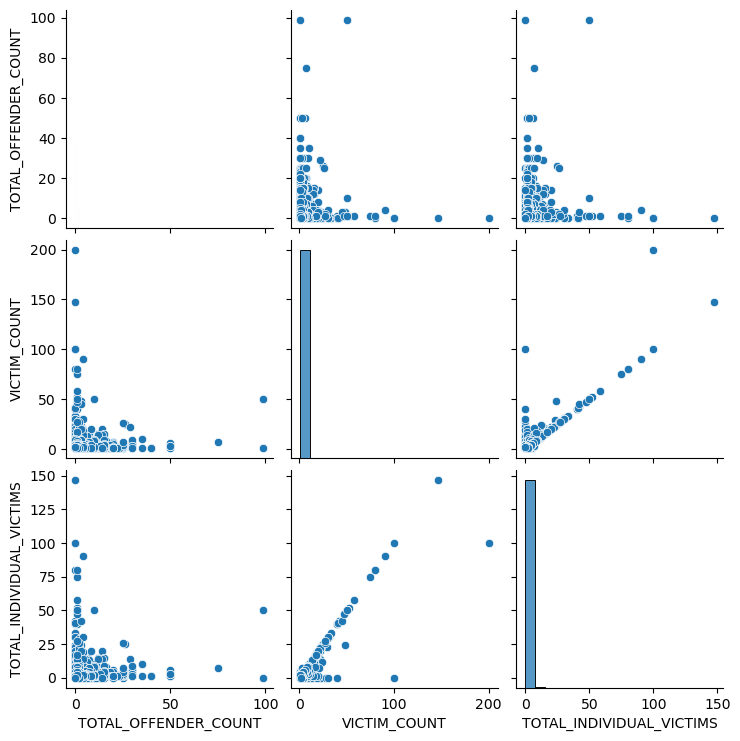

In [31]:
g = sns.pairplot(sub)

There is a strong positive relationship between the total individual victims and victim count which is pretty obvious. 

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TOTAL_INDIVIDUAL_VICTIMS', ylabel='Count'>

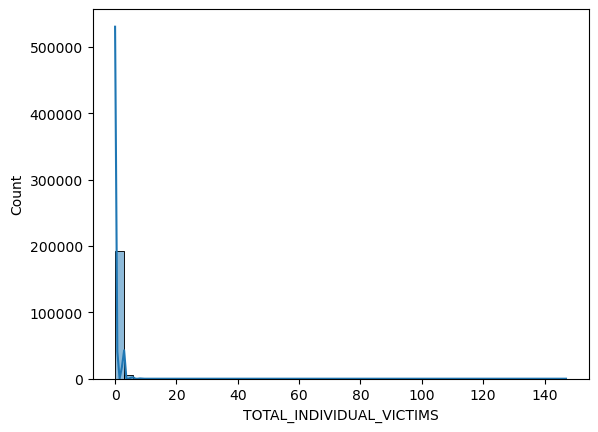

In [32]:
#Create a categorical plot. 
sns.histplot(df['TOTAL_INDIVIDUAL_VICTIMS'], bins = 50, kde = True)

In [33]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] < 2, 'Individual Victim Category'] = 'Low Victim Count'

In [34]:
df.loc[(df['TOTAL_INDIVIDUAL_VICTIMS'] >= 2) & (df['TOTAL_INDIVIDUAL_VICTIMS'] < 10),'Individual Victim Category'] = 'Median Victim Count' 


In [35]:
df.loc[df['TOTAL_INDIVIDUAL_VICTIMS'] >= 10, 'Individual Victim Category'] = 'High Victim Count'


In [36]:
df['TOTAL_INDIVIDUAL_VICTIMS'].value_counts(dropna = False)

TOTAL_INDIVIDUAL_VICTIMS
1.0      132053
0.0       43627
2.0       17527
3.0        3930
4.0        1367
5.0         582
6.0         271
7.0         120
8.0          82
10.0         61
9.0          47
12.0         18
11.0         17
13.0         11
14.0         10
20.0          9
16.0          7
15.0          7
25.0          5
18.0          4
30.0          4
50.0          4
17.0          3
24.0          3
19.0          3
41.0          2
22.0          2
80.0          2
23.0          2
100.0         2
42.0          2
40.0          2
26.0          2
58.0          1
33.0          1
147.0         1
90.0          1
29.0          1
52.0          1
47.0          1
75.0          1
27.0          1
Name: count, dtype: int64

In [37]:
df.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'TOTAL_OFFENDER_COUNT', 'OFFENDER_RACE',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS', 'Individual Victim Category'],
      dtype='object')

C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\msyeu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


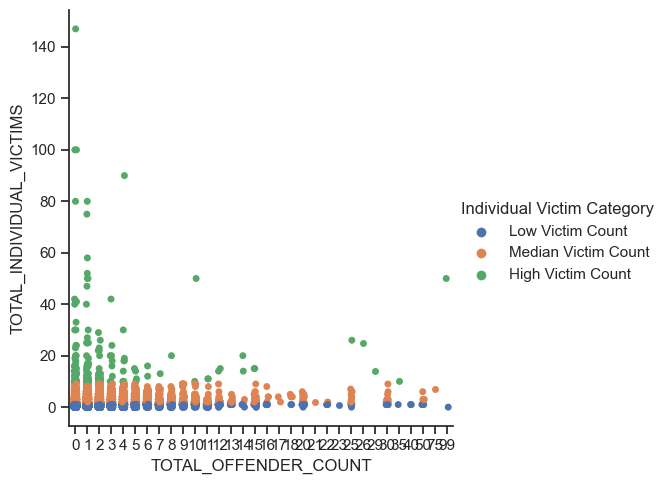

In [38]:
sns.set(style="ticks")
g = sns.catplot(x="TOTAL_OFFENDER_COUNT", y="TOTAL_INDIVIDUAL_VICTIMS", hue="Individual Victim Category", data=df)

Questions: 

1. What type of hate crimes are more common throughout 1991-2018?
2. Which ethnic group was most and least affected?
3. Which states had the most hate crimes reported throughout 1991-2018?


Hypotheses

If the total individual victims count increases, then the victim count increases. 